In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/content/drive/MyDrive/PGA28/ML/Agglomerative Clustering/Project/google_review_ratings.csv')
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [14]:
df.shape

(5456, 26)

#### Handling Null values

In [15]:
df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [16]:
df.drop('Unnamed: 25',axis=1,inplace=True)
df.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24'],
      dtype='object')

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [18]:
df.shape

(5454, 25)

In [19]:
df.columns = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls',
              'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 
              'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs',
              'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points',
              'monuments', 'gardens']
df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [20]:
data = df.iloc[:,1:]
data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [21]:
data.dtypes

churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [23]:
df['local_services'].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [24]:
data['local_services'] = pd.to_numeric(data['local_services'])

In [25]:
# data['local_services'] = data['local_services'].replace('4.52\t2','4.52')
data.dtypes.value_counts()

float64    24
dtype: int64

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

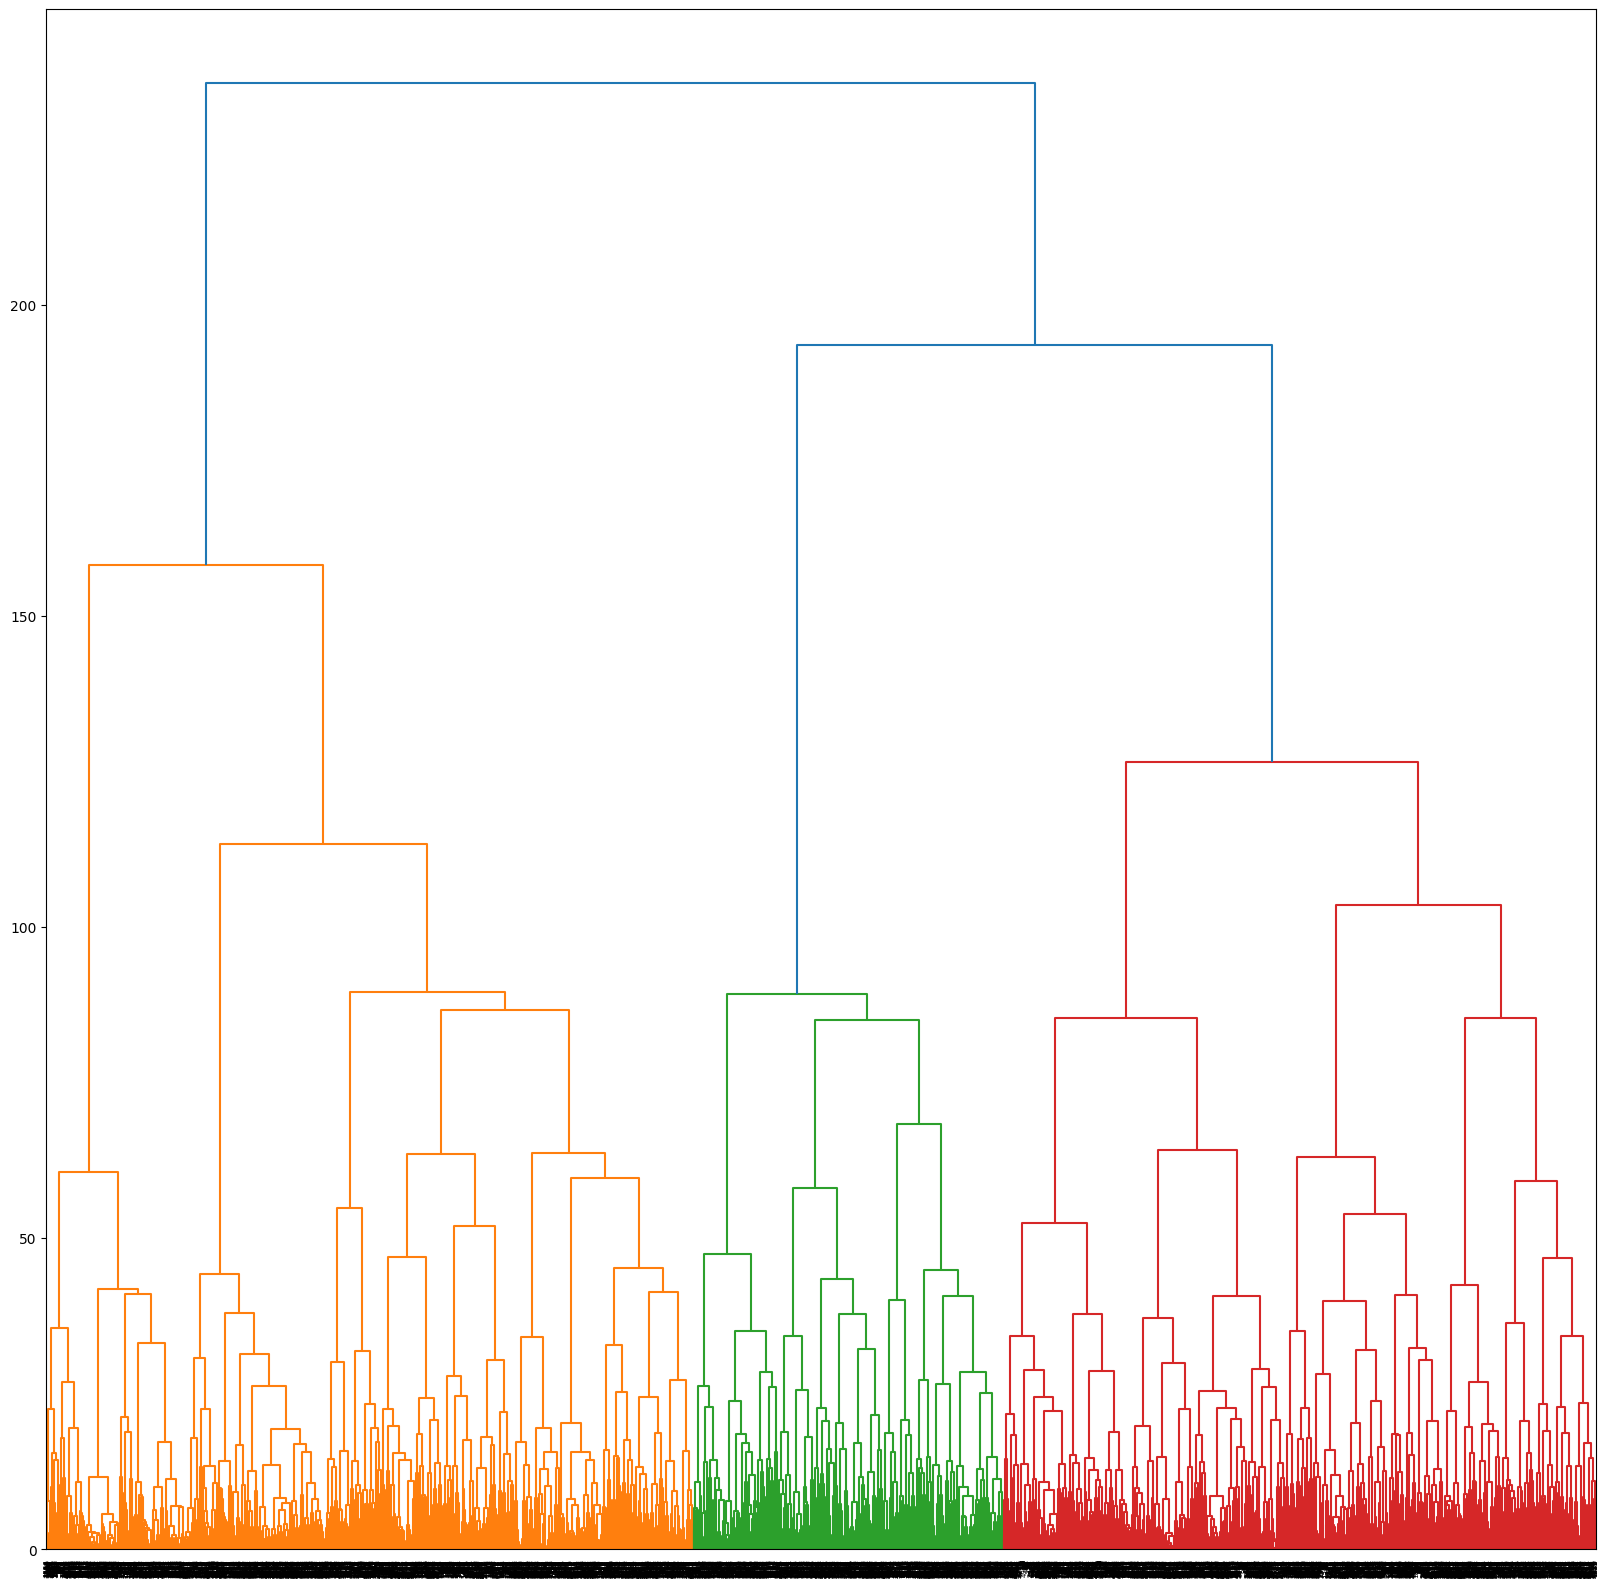

In [31]:
plt.figure(figsize=(20,20))
dendrogram(linkage(data,method='ward',metric='euclidean'))
plt.show()

### Standardized data set

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
data_sc = sc.fit_transform(data)
print(data_sc.shape)
print(type(data_sc))

(5454, 24)
<class 'numpy.ndarray'>


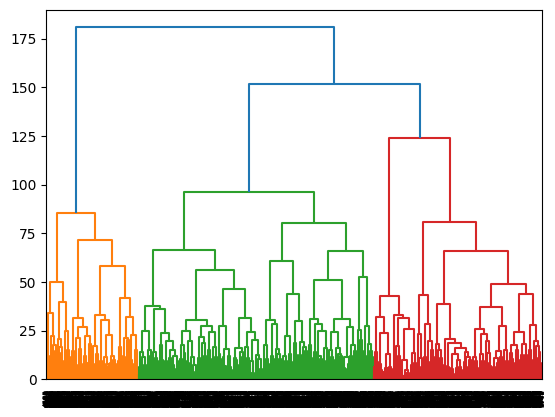

In [35]:
# plt.figure(figsize=(20,20))
dendrogram(linkage(data_sc,method='ward',metric='euclidean'))
plt.show()

#### Appplying Agglomerative Clustering with 4 clusters

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
m4 = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
ypred_m4 = m4.fit_predict(data_sc)

In [39]:
from collections import Counter

In [40]:
c4_count = Counter(ypred_m4)
print(c4_count)

Counter({0: 2584, 2: 1371, 1: 1023, 3: 476})


In [41]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [42]:
df1['Cluster4'] = ypred_m4

In [55]:
r1 = df1.iloc[:,1:].groupby('Cluster4').mean()
r1

<ipython-input-55-84357fc1da33>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r1 = df1.iloc[:,1:].groupby('Cluster4').mean()


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
Cluster4,,,,,,,,,,,,,,,,,,,,,
0,1.352167,2.605720,2.971347,3.640944,3.949803,3.553769,3.539876,2.381037,2.932020,2.585325,...,1.728603,1.032972,0.733336,0.582221,0.588986,0.830906,0.836676,2.009431,1.692991,1.590913
1,2.542483,2.730782,2.505181,2.222737,2.104614,1.966549,2.103675,1.681193,1.898426,1.663832,...,2.341701,1.631535,1.785171,1.888807,2.394633,1.938719,1.774125,2.517937,2.297517,2.549404
2,1.128840,1.969883,1.887797,2.068162,2.215974,2.795478,4.079818,3.692743,4.545894,4.128884,...,2.421780,1.325128,0.780773,0.424916,0.474194,0.586273,0.739030,1.102837,1.001167,1.084289
3,0.624034,0.895084,1.568067,1.550189,1.555567,1.582794,2.912647,1.941954,2.733845,2.954286,...,3.886050,0.735357,0.811218,0.980630,1.396050,1.087836,0.576681,0.547731,0.530882,0.642500


In [61]:
data.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

In [64]:
r2 = df1.iloc[:,1:-1].mean().reset_index().T
r2.columns = r1.columns
r2.drop(['index'],inplace=True)
r2.index = ['Mean']
r2

<ipython-input-64-9078355655f6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  r2 = df1.iloc[:,1:-1].mean().reset_index().T


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
Mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,...,2.20614,1.19271,0.949349,0.822525,0.96925,0.999626,0.965275,1.749345,1.531051,1.56057


In [66]:
cl4_analysis = pd.concat([r2,r1]).T
cl4_analysis

,Mean,0,1,2,3
churches,1.455746,1.352167,2.542483,1.12884,0.624034
resorts,2.320048,2.60572,2.730782,1.969883,0.895084
beaches,2.489059,2.971347,2.505181,1.887797,1.568067
parks,2.797103,3.640944,2.222737,2.068162,1.550189
theatres,2.958904,3.949803,2.104614,2.215974,1.555567
museums,2.893423,3.553769,1.966549,2.795478,1.582794
malls,3.351476,3.539876,2.103675,4.079818,2.912647
zoo,2.541177,2.381037,1.681193,3.692743,1.941954
restaurants,3.126542,2.93202,1.898426,4.545894,2.733845
pubs_bars,2.832695,2.585325,1.663832,4.128884,2.954286


In [71]:
def cluster_analysis(data,n):  # data is the scaled data, n is the number of clusters
  dfc = df.copy()
  model = AgglomerativeClustering(n_clusters=n,metric='euclidean',linkage='ward')
  ypred = model.fit_predict(data)   # train it on scaled data
  print('Value Count of Each clusters: ',Counter(ypred))
  dfc[f'Cluster_{n}'] = ypred
  r1 = dfc.iloc[:,1:].groupby(f'Cluster_{n}').mean()
  r2 = dfc.iloc[:,1:-1].mean().reset_index().T
  r2.columns = r1.columns
  r2.drop(['index'],inplace=True)
  r2.index = ['Mean']
  df_clus_analysis = pd.concat([r2,r1]).T
  return df_clus_analysis

In [72]:
res5  = cluster_analysis(data_sc,5)
res5

Value Count of Each clusters:  Counter({2: 1371, 4: 1355, 1: 1229, 0: 1023, 3: 476})


<ipython-input-71-7792a8342cb9>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r1 = dfc.iloc[:,1:].groupby(f'Cluster_{n}').mean()
<ipython-input-71-7792a8342cb9>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  r2 = dfc.iloc[:,1:-1].mean().reset_index().T


,Mean,0,1,2,3,4
churches,1.455746,2.542483,1.570366,1.12884,0.624034,1.154258
resorts,2.320048,2.730782,2.328356,1.969883,0.895084,2.857292
beaches,2.489059,2.505181,2.936379,1.887797,1.568067,3.003063
parks,2.797103,2.222737,3.980057,2.068162,1.550189,3.333365
theatres,2.958904,2.104614,4.012311,2.215974,1.555567,3.893107
museums,2.893423,1.966549,3.199609,2.795478,1.582794,3.874996
malls,3.351476,2.103675,3.023922,4.079818,2.912647,4.007852
zoo,2.541177,1.681193,2.421603,3.692743,1.941954,2.344244
restaurants,3.126542,1.898426,2.822132,4.545894,2.733845,3.03169
pubs_bars,2.832695,1.663832,2.667795,4.128884,2.954286,2.510524


In [73]:
res6  = cluster_analysis(data_sc,6)
res6

Value Count of Each clusters:  Counter({0: 1371, 4: 1355, 1: 1229, 2: 748, 3: 476, 5: 275})


<ipython-input-71-7792a8342cb9>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r1 = dfc.iloc[:,1:].groupby(f'Cluster_{n}').mean()
<ipython-input-71-7792a8342cb9>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  r2 = dfc.iloc[:,1:-1].mean().reset_index().T


,Mean,0,1,2,3,4,5
churches,1.455746,1.12884,1.570366,2.717807,0.624034,1.154258,2.0656
resorts,2.320048,1.969883,2.328356,2.91365,0.895084,2.857292,2.233382
beaches,2.489059,1.887797,2.936379,2.655174,1.568067,3.003063,2.0972
parks,2.797103,2.068162,3.980057,2.294171,1.550189,3.333365,2.028436
theatres,2.958904,2.215974,4.012311,2.161297,1.555567,3.893107,1.950436
museums,2.893423,2.795478,3.199609,2.037928,1.582794,3.874996,1.7724
malls,3.351476,4.079818,3.023922,2.078008,2.912647,4.007852,2.173491
zoo,2.541177,3.692743,2.421603,1.656885,1.941954,2.344244,1.747309
restaurants,3.126542,4.545894,2.822132,1.881952,2.733845,3.03169,1.943236
pubs_bars,2.832695,4.128884,2.667795,1.625842,2.954286,2.510524,1.767164


In [74]:
res4  = cluster_analysis(data_sc,4)
res4

Value Count of Each clusters:  Counter({0: 2584, 2: 1371, 1: 1023, 3: 476})


<ipython-input-71-7792a8342cb9>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r1 = dfc.iloc[:,1:].groupby(f'Cluster_{n}').mean()
<ipython-input-71-7792a8342cb9>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  r2 = dfc.iloc[:,1:-1].mean().reset_index().T


,Mean,0,1,2,3
churches,1.455746,1.352167,2.542483,1.12884,0.624034
resorts,2.320048,2.60572,2.730782,1.969883,0.895084
beaches,2.489059,2.971347,2.505181,1.887797,1.568067
parks,2.797103,3.640944,2.222737,2.068162,1.550189
theatres,2.958904,3.949803,2.104614,2.215974,1.555567
museums,2.893423,3.553769,1.966549,2.795478,1.582794
malls,3.351476,3.539876,2.103675,4.079818,2.912647
zoo,2.541177,2.381037,1.681193,3.692743,1.941954
restaurants,3.126542,2.93202,1.898426,4.545894,2.733845
pubs_bars,2.832695,2.585325,1.663832,4.128884,2.954286
